# Plots and calculations for ICRC 2025

In [1]:
from matplotlib import pyplot as plt

from cr_knee_fit import experiments
from cr_knee_fit.elements import Element
from cr_knee_fit.fit_data import Data, DataConfig
from cr_knee_fit.utils import legend_artist_line, legend_with_added_items

In [2]:
dc_all = DataConfig(
    experiments_elements=list(experiments.ICRC25),
    experiments_all_particle=experiments.ICRC25,
    experiments_lnA=experiments.ICRC25,
)

In [3]:
dc_direct = DataConfig(
    experiments_elements=list(experiments.DIRECT),
    experiments_all_particle=[],
    experiments_lnA=[],
    elements_R_bounds=(500, 1e8),
)

data_direct = Data.load(dc_direct)
data_le = Data.load(
    DataConfig(
        experiments_elements=list(experiments.DIRECT),
        experiments_all_particle=[],
        experiments_lnA=[],
        elements_R_bounds=(1, 500),
    )
)

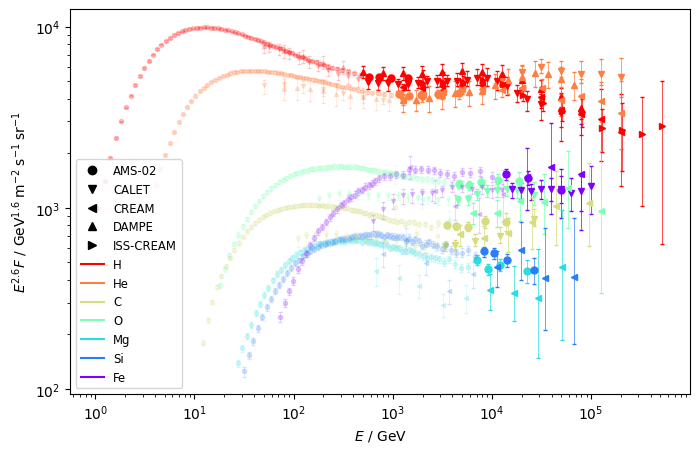

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))

scale = 2.6

for exp, ps in data_direct.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=True, marker_size=5.0)
for exp, ps in data_le.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=False)


ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(data_direct.experiments(spectra_only=True))
    ]
    + [(legend_artist_line(element.color), element.name) for element in Element.regular()],
    fontsize="small",
)

plt.show()

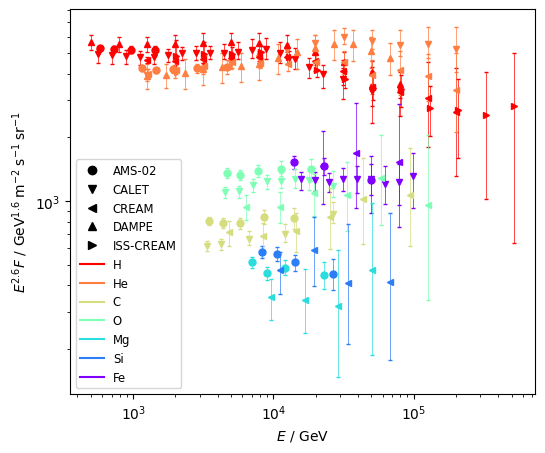

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))

scale = 2.6

for exp, ps in data_direct.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=True, marker_size=5.0)

ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(data_direct.experiments(spectra_only=True))
    ]
    + [(legend_artist_line(element.color), element.name) for element in Element.regular()],
    fontsize="small",
)

plt.show()

In [6]:
data_grapes = Data.load(DataConfig(experiments_elements=[experiments.grapes]))

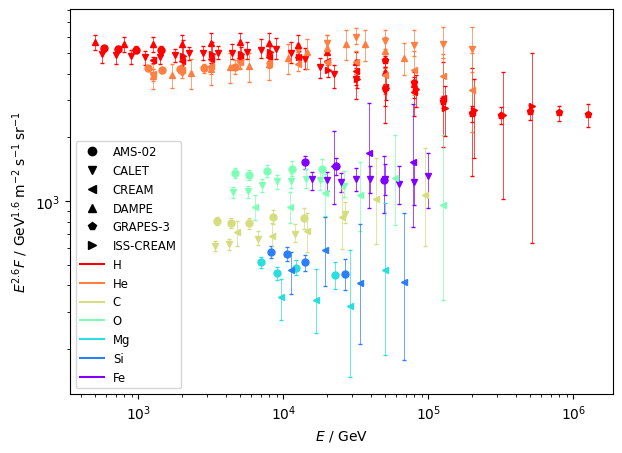

In [7]:
fig, ax = plt.subplots(figsize=(7, 5))

scale = 2.6

for exp, ps in data_direct.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=True, marker_size=5.0)
for exp, ps in data_grapes.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=True, marker_size=5.0)

ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(
            data_direct.experiments(spectra_only=True) + data_grapes.experiments(spectra_only=True)
        )
    ]
    + [(legend_artist_line(element.color), element.name) for element in Element.regular()],
    fontsize="small",
)

plt.show()

In [8]:
lhaaso = experiments.lhaaso_qgsjet
data_lhaaso = Data.load(
    DataConfig(
        experiments_elements=[lhaaso], experiments_all_particle=[lhaaso], experiments_lnA=[lhaaso]
    )
)

In [9]:
data_all = Data.load(
    DataConfig(
        experiments_elements=experiments.DIRECT + [experiments.grapes, lhaaso],
        experiments_all_particle=[experiments.hawc, experiments.grapes, lhaaso],
        experiments_lnA=[lhaaso],
    )
)
data_kascade = Data.load(
    DataConfig(
        experiments_elements=[experiments.kascade_re_qgsjet],
        experiments_all_particle=[experiments.kascade_re_qgsjet],
        experiments_lnA=[experiments.kascade_re_qgsjet],
    )
)

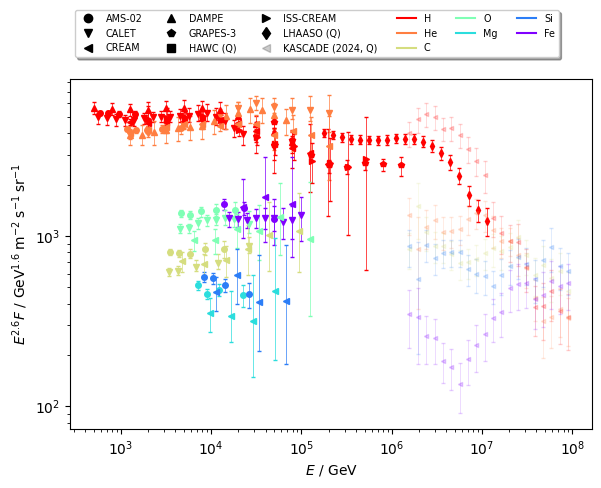

In [10]:
fig, ax = plt.subplots(figsize=(6.2, 5))

scale = 2.6

for exp, ps in data_all.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=True, marker_size=4.0)
for exp, ps in data_kascade.element_spectra.items():
    for p, s in ps.items():
        s.plot(scale=scale, ax=ax, add_label=False, is_fitted=False)


ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(data_all.experiments(spectra_only=True))
    ]
    + [
        (exp.legend_artist(is_fitted=False), exp.name)
        for exp in sorted(data_kascade.experiments(spectra_only=True))
    ]
    + [(legend_artist_line(element.color), element.name) for element in Element.regular()],
    fontsize="x-small",
    bbox_to_anchor=(0.00, 1.05, 1.0, 0.0),
    loc="lower left",
    fancybox=True,
    shadow=True,
    ncol=6,
)

fig.tight_layout()
plt.show()

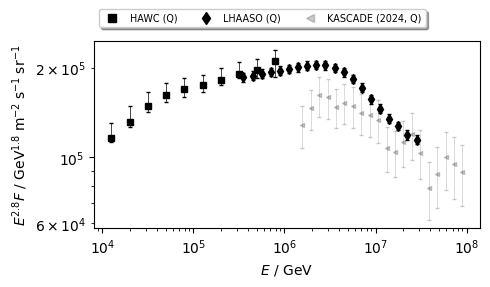

In [11]:
fig, ax = plt.subplots(figsize=(5, 3))

scale = 2.8

for exp, s in data_all.all_particle_spectra.items():
    s.plot(scale=scale, ax=ax, add_label=False, is_fitted=True, marker_size=5.0)
for exp, s in data_kascade.all_particle_spectra.items():
    s.plot(scale=scale, ax=ax, add_label=False, is_fitted=False)


ax.set_xscale("log")
ax.set_yscale("log")
legend_with_added_items(
    ax,
    [
        (exp.legend_artist(is_fitted=True), exp.name)
        for exp in sorted(data_all.all_particle_spectra.keys())
    ]
    + [
        (exp.legend_artist(is_fitted=False), exp.name)
        for exp in sorted(data_kascade.all_particle_spectra.keys())
    ],
    fontsize="x-small",
    bbox_to_anchor=(0.00, 1.05, 1.0, 0.0),
    loc="lower left",
    fancybox=True,
    shadow=True,
    ncol=4,
)

fig.tight_layout()
plt.show()

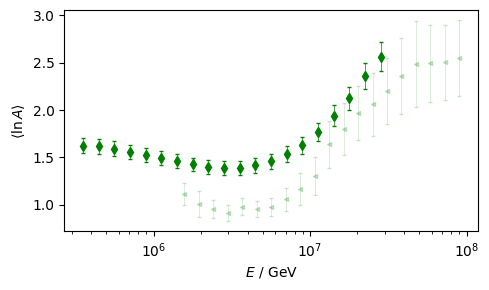

In [13]:
from cr_knee_fit.utils import E_GEV_LABEL, LN_A_LABEL

fig, ax = plt.subplots(figsize=(5, 3))

for exp, s in data_all.lnA.items():
    s.plot(scale=0, color="green", ax=ax, add_label=False, is_fitted=True, marker_size=5.0)
for exp, s in data_kascade.lnA.items():
    s.plot(scale=0, color="green", ax=ax, add_label=False, is_fitted=False)

ax.set_xscale("log")
# legend_with_added_items(
#     ax,
#     [
#         (exp.legend_artist(is_fitted=True), exp.name)
#         for exp in sorted(data_all.all_particle_spectra.keys())
#     ]
#     + [
#         (exp.legend_artist(is_fitted=False), exp.name)
#         for exp in sorted(data_kascade.all_particle_spectra.keys())
#     ],
#         fontsize="x-small",
#         bbox_to_anchor=(0.00, 1.05, 1.0, 0.0),
#         loc="lower left",
#         fancybox=True,
#         shadow=True,
#         ncol=4,
# )
ax.set_xlabel(E_GEV_LABEL)
ax.set_ylabel(LN_A_LABEL)

fig.tight_layout()
plt.show()